In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [2]:
# taken from https://github.com/milesial/Pytorch-UNet/blob/master/unet/unet_parts.py

# Import the model
from unet import UNet

In [3]:
# create some temporary dataloader to check model works
transform_size = (128, 128)

transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Resize(transform_size, max_size=None)])

pet_dataset = datasets.OxfordIIITPet('', transform=transform, download=True)
data_loader = torch.utils.data.DataLoader(pet_dataset,
                                          batch_size=4,
                                          shuffle=True,
                                          num_workers=1)

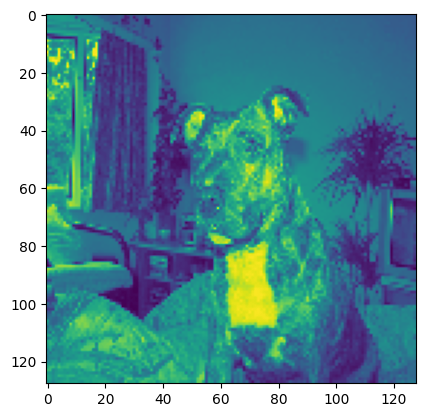

In [4]:
# check data loads as expected - every time you run this a different image will show
data = next(iter(data_loader))
imgs, labels = data
plt.imshow(imgs[0,0])

In [5]:
# Load an untrained UNet - 3 channels going in, binary channel coming out
model = UNet(3, 2)

In [6]:
# Compare the size of input and outputs - outputs should be same size as inputs but with only 2 channels
output = model(imgs)
output = output.detach()

print(f'imgs size [B,C,W,H]: {imgs.shape}')
print(f'output size [B,C,W,H]: {output.shape}')

imgs size: torch.Size([4, 3, 128, 128])
labels size: torch.Size([4])
output size: torch.Size([4, 2, 128, 128])


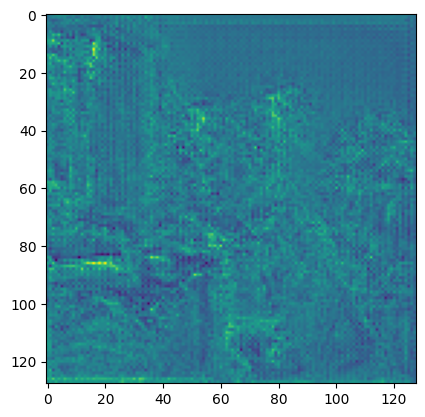

In [7]:
# show the output - will be very noisy since model is randomly initialized
plt.imshow(output[0,0])